In [9]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


directory = 'dreamfiles/dream4q16nzero_cont_888'
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []
for filename in os.listdir(directory):
    df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), filename])

301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301
301


<Figure size 720x720 with 0 Axes>

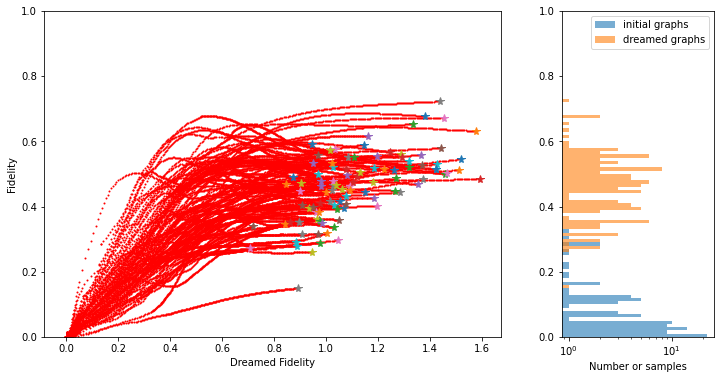

In [93]:

plt.figure(figsize=(10, 10))

#data = sorted(data, key=lambda x: x[0][0])
init = []
final = []
for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))
#plt.subplot(211)
for ii, sample in enumerate(data):
    print(len(sample[1]))
    a0.scatter(sample[1], sample[0], color=c, s=1)
    a0.plot([sample[1][-1]], [sample[0][-1]], marker='*', markersize=8)

a0.set_ylim([0, 1])
a0.set_xlabel('Dreamed Fidelity')
a0.set_ylabel('Fidelity')

#plt.subplot(212)
bins = np.arange(0, 1, 0.01)  # fixed bin size
a1.set_ylim([0, 1])
a1.set_xscale('log')
a1.set_xlabel('Number or samples')
a1.hist(init, bins=bins, alpha=0.6, orientation="horizontal",label='initial graphs')
a1.hist(final, bins=bins, alpha=0.6, orientation="horizontal",label='dreamed graphs')
a1.legend(prop={'size': 10})

24


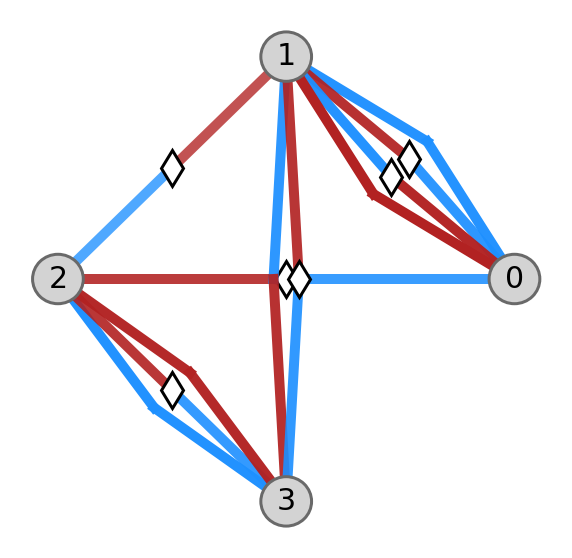

0.1682437082702304
{((0, 0), (1, 0), (2, 0), (3, 0)): 0.28677047213913365,
 ((0, 0), (1, 0), (2, 1), (3, 0)): -0.25787126176550357,
 ((0, 0), (1, 0), (2, 1), (3, 1)): 0.04516247356908434,
 ((0, 0), (1, 1), (2, 0), (3, 0)): -0.27226788015195774,
 ((0, 0), (1, 1), (2, 1), (3, 0)): 0.47703527848464633,
 ((0, 0), (1, 1), (2, 1), (3, 1)): -0.267569003887532,
 ((0, 1), (1, 0), (2, 0), (3, 0)): -0.2871792214331078,
 ((0, 1), (1, 0), (2, 1), (3, 0)): 0.25823881946904476,
 ((0, 1), (1, 0), (2, 1), (3, 1)): -0.2822230010134419,
 ((0, 1), (1, 1), (2, 0), (3, 0)): 0.2984557154019235,
 ((0, 1), (1, 1), (2, 1), (3, 0)): -0.26837892805950925,
 ((0, 1), (1, 1), (2, 1), (3, 1)): 0.29330488205242383}


In [18]:
DIM = [2] * 4
kets = hf.makeState('0000+1111')
state = fc.State(kets, normalize=True)

# This seems to reconstruct the graph that was observed to have the maximum actual fidelity


fids = [data[ii][0][-1] for ii in range(len(data))]
ind = 8
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=4 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)

newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=7e-1, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)
print(newgraph.state)

In [97]:
dreamstate

{((0, 0), (1, 0), (2, 0), (3, 0)): 0.6090977429038597,
 ((0, 0), (1, 1), (2, 0), (3, 1)): 0.4994059570260126,
 ((0, 1), (1, 1), (2, 0), (3, 1)): 0.4652025868987332,
 ((0, 1), (1, 1), (2, 1), (3, 1)): 0.40395566937361144}

24


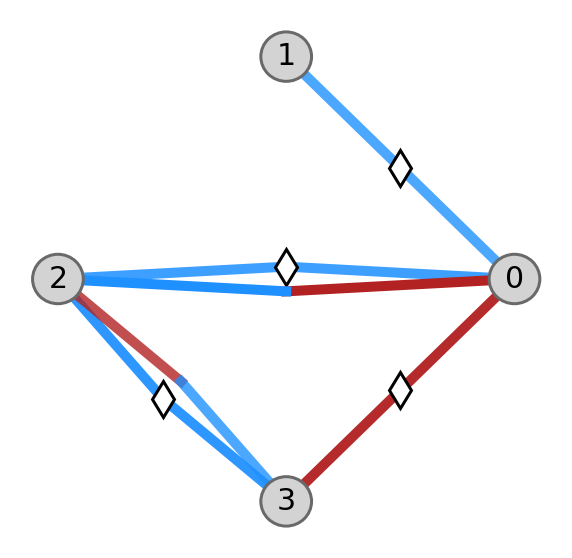

0.30035898178519604


In [95]:
# This seems to reconstruct the graph that was observed to have the maximum predicted fidelity

preds = [data[ii][1][-1] for ii in range(len(data))]
ind = np.argmax(preds)
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=4 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)

newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=7e-1, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)